In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns; sns.set()

got = pd.read_csv('https://raw.githubusercontent.com/trong-shen/Game-of-Throne-Project/master/Game_of_Thrones_Script_clean.csv')
table = pd.read_csv('https://raw.githubusercontent.com/trong-shen/Game-of-Throne-Project/master/got_table.csv')
gotwords = pd.read_csv('https://raw.githubusercontent.com/trong-shen/Game-of-Throne-Project/master/GOT_house_csv.csv')

In [29]:
gotwords

,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words
0,4/17/2011,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,NaN,what do you expect they are savages one lot s...,27
1,4/17/2011,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,NaN,i have never seen wildlings do a thing like t...,23
2,4/17/2011,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,NaN,how close did you get,5
3,4/17/2011,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,NaN,close as any man would,5
4,4/17/2011,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,NaN,we should head back to the wall,7
...,...,...,...,...,...,...,...,...,...
23906,5/19/2019,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...,House Tarth,i think we can all agree that ships take prec...,12
23907,5/19/2019,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.,House Bronn,i think that is a very presumptuous statement,8
23908,5/19/2019,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...,House Lannister,i once brought a jackass and a honeycomb into...,11
23909,5/19/2019,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!,0,the queen in the north,5


In [30]:
#test for any null values
test = got['Name']
print(np.where(pd.isnull(test)))
test = table['salary']
print(np.where(pd.isnull(test)))

(array([], dtype=int64),)
(array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  12,  13,  14,  16,
        17,  18,  20,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  41,  42,  43,  44,  45,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  70,  71,  72,  73,  74,
        75,  76,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 133, 135,
       136, 137, 138, 139, 140, 141, 142, 143]),)


In [31]:
mainchar = table.loc[table['salary'].notnull(), ['name', 'male', 'culture', 'house', 'isNoble', 'age', 'isAlive', 'salary']]
mainchar = mainchar.reset_index()
del mainchar['index']

for i in mainchar['name']:
    helper = gotwords.loc[gotwords['Name']==i, ['Episode Title']]
    mainchar.loc[mainchar['name']==i, 'numep']=len(helper['Episode Title'].unique())
    mainchar['tsalary'] = mainchar['salary'] * mainchar['numep']
    
    helper2 = gotwords.loc[gotwords['Name']==i, ['Num_Words']]
    mainchar.loc[mainchar['name']==i, 'numword'] = helper2['Num_Words'].sum()
    
    mainchar['sPer'] = mainchar['tsalary'] / mainchar['numword']

mainchar

,name,male,culture,house,isNoble,age,isAlive,salary,numep,tsalary,numword,sPer
0,arya stark,0,Northmen,House Stark,1,16,1,175000.0,57.0,9975000.0,6795.0,1467.991170
1,bran stark,1,Northmen,House Stark,1,15,1,175000.0,38.0,6650000.0,3458.0,1923.076923
2,brienne,0,Stormlands,House Tarth,0,0,1,100000.0,33.0,3300000.0,4077.0,809.418690
3,cersei lannister,0,Westerlands,House Lannister,1,39,0,500000.0,58.0,29000000.0,14940.0,1941.097724
4,daenerys targaryen,0,Valyrian,House Targaryen,1,21,0,500000.0,60.0,30000000.0,12715.0,2359.418010
5,davos,1,Stormlands,House Seaworth,0,45,1,300000.0,40.0,12000000.0,7142.0,1680.201624
6,jaime lannister,1,Westerlands,House Lannister,1,39,0,500000.0,54.0,27000000.0,12316.0,2192.270218
7,jon snow,1,Northmen,House Stark,1,22,1,500000.0,60.0,30000000.0,12915.0,2322.880372
8,jorah mormont,1,Northmen,House Mormont,1,51,0,100000.0,49.0,4900000.0,4792.0,1022.537563
9,margaery tyrell,0,Reach,House Tyrell,1,22,0,100000.0,24.0,2400000.0,3268.0,734.394125


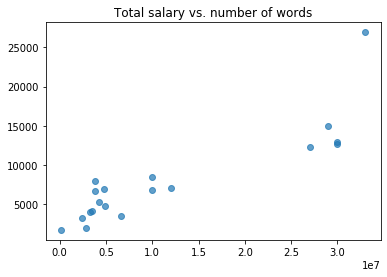

In [32]:
plt.scatter(mainchar['tsalary'], mainchar['numword'], alpha=0.7)
plt.title('Total salary vs. number of words')
plt.show()


Text(0.5, 1.0, 'Dollars per word for each main character')

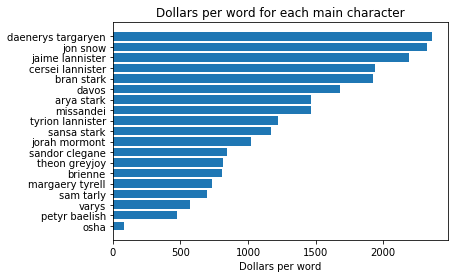

In [33]:
mainchar_s = mainchar.sort_values('sPer')
plt.barh(mainchar_s['name'], mainchar_s['sPer'])
plt.xlabel('Dollars per word')
plt.title('Dollars per word for each main character')

In [40]:
eplist = gotwords['Episode Title'].unique()
newdf =pd.DataFrame(eplist, columns=['epname'])
new_cols = mainchar['name'].unique()
new_cols = np.array(new_cols).tolist()
new_cols.insert(0, 'epname')
newdf = newdf.reindex(columns=new_cols, fill_value=0)
newdf = newdf.set_index('epname')
cumdf = newdf



,arya stark,bran stark,brienne,cersei lannister,daenerys targaryen,davos,jaime lannister,jon snow,jorah mormont,margaery tyrell,missandei,osha,petyr baelish,sam tarly,sandor clegane,sansa stark,theon greyjoy,tyrion lannister,varys
epname,,,,,,,,,,,,,,,,,,,
Winter is Coming,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Kingsroad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Lord Snow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Cripples, Bastards and Broken Things",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Wolf and the Lion,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A Knight of the Seven Kingdoms,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Long Night,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Last of the Starks,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
for i in mainchar['name']:
    for j in eplist:
        isIn = len(gotwords.loc[(gotwords['Episode Title']==j) & (gotwords['Name']==i), 'Sentences_Clean'].values)
        if isIn>0:
            cumdf.loc[j, i]= 1

cumdf = cumdf.cumsum()



In [36]:
cumSal_df = cumdf.mul(list(mainchar['salary']), axis =1)
cumSal_df

,arya stark,bran stark,brienne,cersei lannister,daenerys targaryen,davos,jaime lannister,jon snow,jorah mormont,margaery tyrell,missandei,osha,petyr baelish,sam tarly,sandor clegane,sansa stark,theon greyjoy,tyrion lannister,varys
epname,,,,,,,,,,,,,,,,,,,
Winter is Coming,175000.0,175000.0,0.0,500000.0,500000.0,0.0,500000.0,500000.0,100000.0,0.0,0.0,0.0,0.0,0.0,100000.0,175000.0,100000.0,500000.0,0.0
The Kingsroad,350000.0,175000.0,0.0,1000000.0,1000000.0,0.0,1000000.0,1000000.0,200000.0,0.0,0.0,0.0,0.0,0.0,200000.0,350000.0,200000.0,1000000.0,0.0
Lord Snow,525000.0,350000.0,0.0,1500000.0,1500000.0,0.0,1500000.0,1500000.0,300000.0,0.0,0.0,0.0,100000.0,0.0,200000.0,525000.0,200000.0,1500000.0,100000.0
"Cripples, Bastards and Broken Things",700000.0,525000.0,0.0,2000000.0,2000000.0,0.0,2000000.0,2000000.0,400000.0,0.0,0.0,0.0,200000.0,100000.0,200000.0,700000.0,300000.0,2000000.0,200000.0
The Wolf and the Lion,875000.0,700000.0,0.0,2500000.0,2000000.0,0.0,2500000.0,2000000.0,400000.0,0.0,0.0,0.0,300000.0,100000.0,300000.0,875000.0,400000.0,2500000.0,300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A Knight of the Seven Kingdoms,9450000.0,6125000.0,3100000.0,28500000.0,28000000.0,10800000.0,25500000.0,28000000.0,4800000.0,2400000.0,2800000.0,140000.0,3800000.0,4500000.0,3200000.0,9625000.0,4200000.0,31000000.0,3600000.0
The Long Night,9625000.0,6300000.0,3200000.0,28500000.0,28500000.0,11100000.0,26000000.0,28500000.0,4900000.0,2400000.0,2900000.0,140000.0,3800000.0,4600000.0,3300000.0,9800000.0,4300000.0,31500000.0,3700000.0
The Last of the Starks,9625000.0,6475000.0,3200000.0,28500000.0,29000000.0,11400000.0,26500000.0,29000000.0,4900000.0,2400000.0,2900000.0,140000.0,3800000.0,4700000.0,3400000.0,9800000.0,4300000.0,32000000.0,3700000.0


Text(0.5, 1.0, 'Cumulative salary by episode over time')

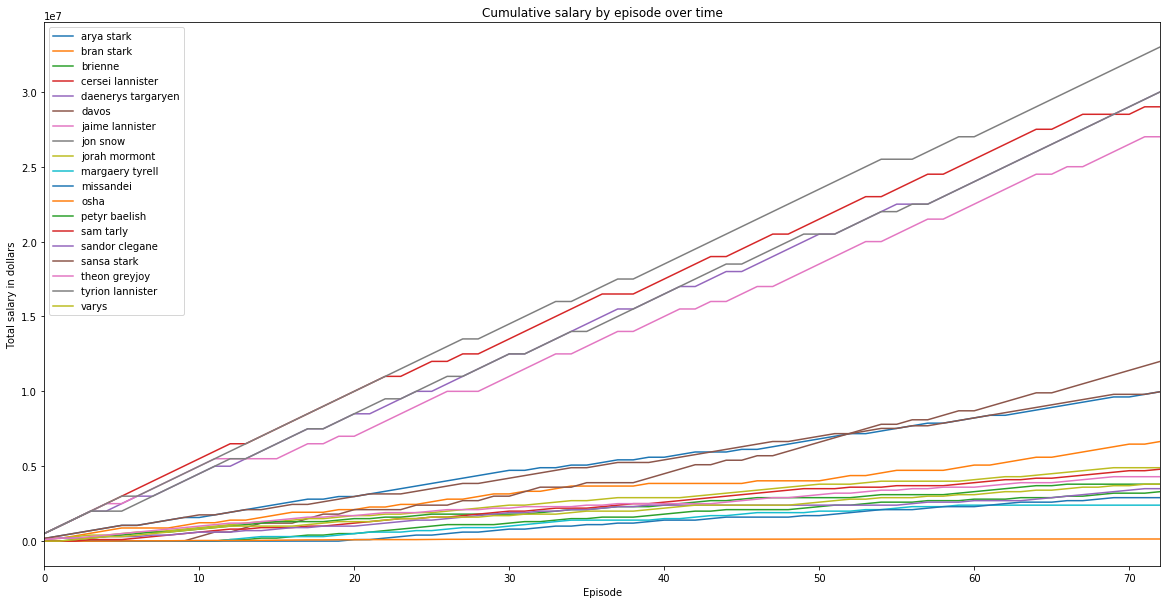

In [37]:
cumSal_df = cumSal_df.reset_index(drop=True)
cumSal_df.plot(figsize=(20,10))
plt.xlabel('Episode')
plt.ylabel('Total salary in dollars')
plt.title('Cumulative salary by episode over time')

,arya stark,bran stark,brienne,cersei lannister,daenerys targaryen,davos,jaime lannister,jon snow,jorah mormont,margaery tyrell,missandei,osha,petyr baelish,sam tarly,sandor clegane,sansa stark,theon greyjoy,tyrion lannister,varys
epname,,,,,,,,,,,,,,,,,,,
Winter is Coming,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Kingsroad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Lord Snow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Cripples, Bastards and Broken Things",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Wolf and the Lion,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A Knight of the Seven Kingdoms,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Long Night,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Last of the Starks,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
wordsdf = newdf

for i in mainchar['name']:
    for j in eplist:
        wordslist = gotwords.loc[(gotwords['Episode Title']==j) & (gotwords['Name']==i), 'Num_Words'].values
        wordsdf.loc[j, i]= np.sum(wordslist)


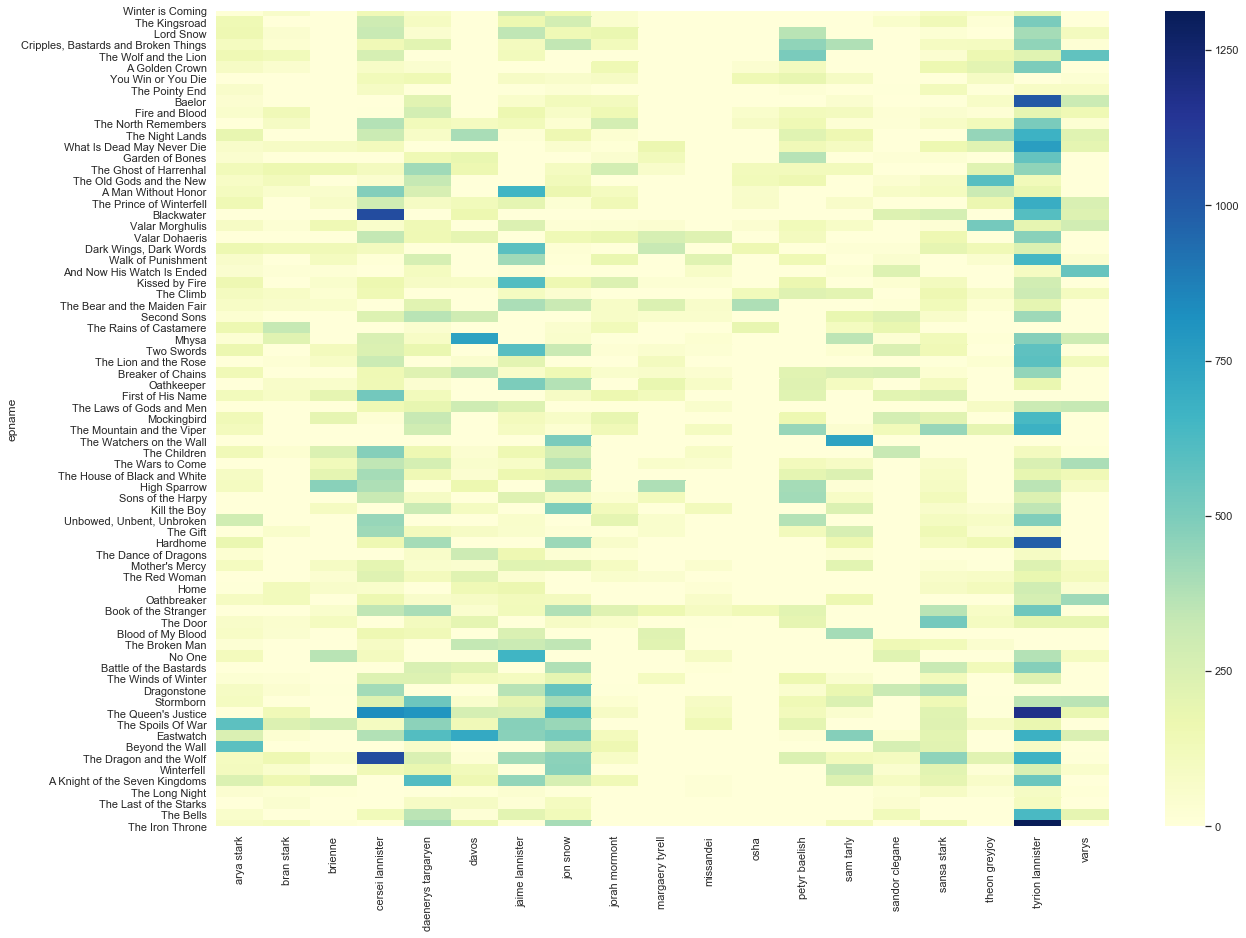

In [52]:
plt.subplots(figsize=(20,15))
ax = sns.heatmap(wordsdf, cmap="YlGnBu")